## 학과: IT 미디어 공학과
## 학번: 20171101
## 이름(영문이름): 박경선(gyeongseon park)

In [1]:
from tensorflow import keras

In [3]:
# 앞서 만든 모델이 어떤 가중치를 학습했는지 확인하기
model = keras.models.load_model('best-cnn-model.h5')

In [10]:
# 모델에 추가한 층은 layers 속성에 저장되어 있다. 이 속성은 파이썬 리스트이다.
model.layers

In [11]:
# layers 속성의 첫 번째 원소 layers[0]은 weights 속성이다.
# weights 속성의 첫 번째 원소 weights[0]은 가중치이고, 두 번째 원소 weights[1]은 절편이다.
conv = model.layers[0]

print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [12]:
# 가중치를 numpy()을 사용해 넘파이 배열로 변환한다.
conv_weights = conv.weights[0].numpy()

# 가중치 배열의 평균과 표준편차를 구한다.
print(conv_weights.mean(), conv_weights.std())

-0.012730394 0.24677457


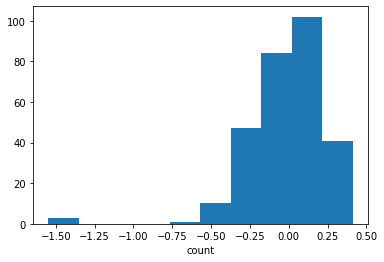

In [13]:
# 가중치가 어떤 분포를 가졌는지 직관적으로 이해하기 쉽도록 ㅣㅎ스토그램을 그린다.
import matplotlib.pyplot as plt

# hist()는 히스토그램을 그리기 위해 1차원 배열로 전달해야한다.
# reshape()으로 1개의 열이 있는 배열로 변환한다.
plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.xlabel('count')
plt.show()

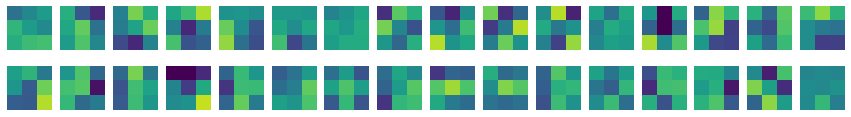

In [17]:
# 32개의 커널을 16개씩 두 줄에 그림으로 출력한다.
fig, axs = plt.subplots(2, 16, figsize=(15,2))

# (3, 3, 1, 32)에서 마지막 파원이 필터의 개수이며 마지막 차원을 순회하면서 그림을 출련한다.
# vmin과 vmax으로 컬러맵의 표현 범위를 지정한다.
for i in range(2):
  for j in range(16):
    axs[i, j].imshow(conv_weights[:, :, 0, i*16+j], vmin=-0.5, vmax=0.5)
    axs[i, j].axis('off')

plt.show()

## 2. 훈련하지 않은 가중치 시각화

In [18]:
# 훈련하지 않은 빈 합성곱 신경망을 만들어서 가중치를 시각화 해본다.
no_training_model = keras.Sequential()

no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                                          padding='same', input_shape=(28, 28, 1)))

In [21]:
# 모델의 layers[0]은 weights 속성이다.
no_training_conv = no_training_model.layers[0]

# weights[0]은 가중치이고 weights[1]은 절편이다.
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [22]:
# 가중치를 배열로 만들어서 평균과 표준편차를 구한다.
no_training_wieghts = no_training_conv.weights[0].numpy()

# weights[0]은 가중치이고 weights[1]은 절편이다.
print(no_training_wieghts.mean(), no_training_wieghts.std())

0.008663559 0.079890236


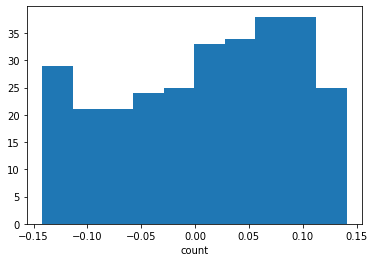

In [23]:
# 훈련되지 않은 가중치를 히스토그램으로 그린다.
plt.hist(no_training_wieghts.reshape(-1, 1))
plt.xlabel('weight')
plt.xlabel('count')
plt.show()

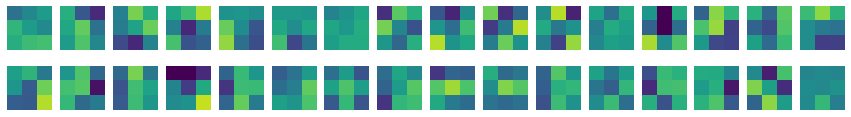

In [24]:
# 훈련되지 않은 가중치를 그림으로 출력한다.
fig, axs = plt.subplots(2, 16, figsize=(15, 2))

for i in range(2):
  for j in range(16):
    axs[i, j].imshow(conv_weights[:, :, 0, i*16+j], vmin=-0.5, vmax=0.5)
    axs[i, j].axis('off')

plt.show()